<a href="https://colab.research.google.com/github/PhDNoe/IA_2023/blob/main/K_Means_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# K-Means

### Notebook de Noe 👻👻

### **Definición de la Clase**

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

class KMeans:
    def __init__(self, n_clusters=2, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X):
        self.centroids = {}
        
        
        # Initialize the centroids randomly
        for i in range(self.n_clusters):
            self.centroids[i] = X[i]
        for i in range(self.max_iter):
            self.clusters = {}
            self.min_distance = []
            self.distances_arr = []
            for j in range(self.n_clusters):
                self.clusters[j] = []
            # Assign each data point to the closest centroid
            for x in X:
                # Get point distance to all centroids
                distances = [np.linalg.norm(x - self.centroids[c]) for c in self.centroids]                
                # Get idx for min distance
                cluster = distances.index(min(distances))
                self.clusters[cluster].append(x)
                self.distances_arr.append(distances)
                self.min_distance.append(distances[cluster])
            # Update the centroids
            prev_centroids = dict(self.centroids)
            
            for cluster in self.clusters:
                self.centroids[cluster] = np.average(self.clusters[cluster], axis=0)
            # Check for convergence
            is_converged = True
            for c in self.centroids:
                if not np.array_equal(self.centroids[c], prev_centroids[c]):
                    is_converged = False
                    break
            if is_converged:
                break
        return self.centroids,  self.distances_arr, self.clusters
        
    
    def predict(self, X):
        distances = [np.linalg.norm(X - self.centroids[c]) for c in self.centroids]
        cluster = distances.index(min(distances))
        return cluster

    def inertia(self):
        # Inertia is the sum of squared distance of samples to their closest cluster center
        return np.sum(np.array(self.min_distance)**2)

    def silohuette(self):
        # TODO
        pass

    def intra_cluster_distance(self):
        d_intra_cluster = []
        for i in range(self.n_clusters):
            d_intra_cluster.append(np.linalg.norm(self.clusters[i] - self.centroids[i]))
        d_ic = np.array(d_intra_cluster)
        return d_intra_cluster, d_ic, d_ic.mean()

        
        

![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### Probamos el algoritmo con un conjunto básico de datos

![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [2]:
import numpy as np

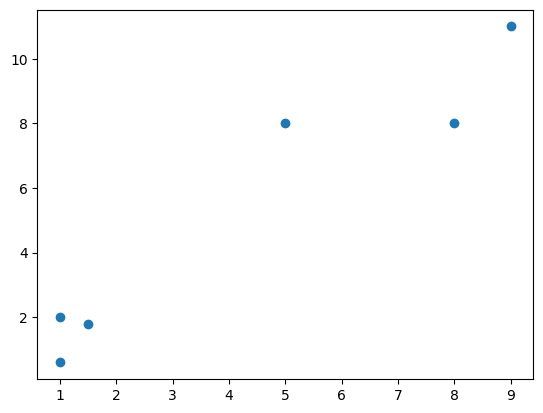

In [3]:
# Pre-visualizamos los datos
X = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]])

plt.scatter(X[:,0], X[:,1])


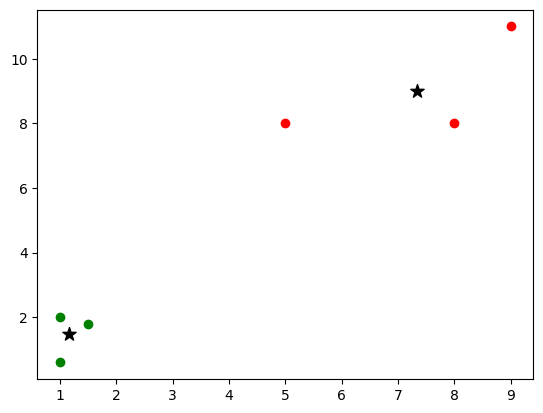

In [4]:
# Instanciamos un modelo Kmeans con K=2
kmeans = KMeans(n_clusters=2)

# Entrenamos el modelo
kmeans.fit(X)

# Warning!! no usar mas de 2 clusters porque tira error porque solo defini 2 colores
colors = ["g", "r"]

for cluster in kmeans.clusters:
    color = colors[cluster]
    for x in kmeans.clusters[cluster]:
        plt.scatter(x[0], x[1], color=color)

for c in kmeans.centroids:
    plt.scatter(kmeans.centroids[c][0], kmeans.centroids[c][1], color="k", marker="*", s=100)

plt.show()


![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
### Ahora probamos con el Iris dataset

![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

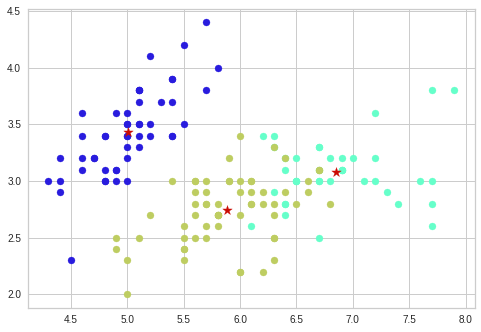

In [ ]:
from sklearn import datasets
from random import randint

iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target
labels = iris.feature_names


# El dataset iris tiene 3 features
nro_clusters = 3

# Generamos un color para cada cluster
several_colors = []

# Para evitar el posible error de las celda anterior, genero tantos colores como clusters
for i in range(200):
    several_colors.append('#%06X' % randint(0, 0xFFFFFF))
sc = np.array(several_colors)

colors = np.random.choice(sc, size=nro_clusters, replace=True, p=None)

# Genero el modelo
kmeans = KMeans(n_clusters=nro_clusters)
# Entreno el modelo
kmeans.fit(X_iris)



# Ploteo los resultados
for cluster in kmeans.clusters:
    color = colors[cluster]
    for x in kmeans.clusters[cluster]:
        plt.scatter(x[0], x[1], color=color)

for c in kmeans.centroids:
    plt.scatter(kmeans.centroids[c][0], kmeans.centroids[c][1], color="r", marker="*", s=100)

plt.show()


---
### Elbow method to get best K

---

[K= 2]  intra_cluster_distance() --> [11.12635953  5.34341421]    average -->8.234886870140596 
[K= 3]  intra_cluster_distance() --> [5.04121475 6.18795763 3.89242855]    average -->5.04053364366964 
[K= 4]  intra_cluster_distance() --> [4.3247471  3.76466239 3.89242855 3.03790864]    average -->3.7549366699407205 
[K= 5]  intra_cluster_distance() --> [4.3247471  3.76466239 1.7646787  3.03790864 2.15190945]    average -->3.008781256313278 
------------------------------------------------------------------------------


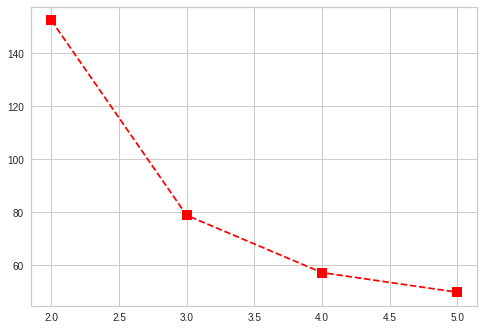

In [ ]:
inertia = []
for K in range(2,6):
        
    kmeans = KMeans(n_clusters=K)
    kmeans.fit(X_iris)
    inertia.append(kmeans.inertia())
    _ , ic_d, ic_d_mean = kmeans.intra_cluster_distance()
    print(f"[K= {K}]  intra_cluster_distance() --> {ic_d}    average -->{ic_d_mean} " )
print("------------------------------------------------------------------------------")    

k = np.arange(2,6)

plt.plot(k,inertia,marker="s", ms=10,ls= '--',color='red')

---
### SKLEARN
---

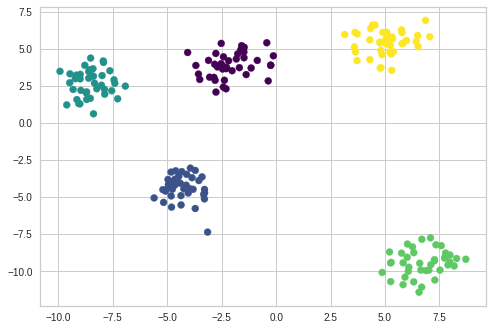

In [ ]:
from sklearn.datasets import make_blobs
# create blobs
data = make_blobs(n_samples=200, n_features=2, centers=5, cluster_std=.8 )

plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='viridis')
plt.show()

In [ ]:
# SI no sabemos como son los datos, primero visualizarlos
data[0]

array([[  4.42699037,  -2.37916456],
       [ -2.50726361,  -9.00654899],
       [  2.27192716,   3.04310945],
       [  3.72388031,   3.32783284],
       [-10.48157141,  -9.46121634],
       [  3.64178645,  -7.81943457],
       [  4.79703374,  -2.48251457],
       [ -7.03852479,  -9.87368863],
       [  5.31644212,  -6.69017366],
       [  4.05917264,  -1.11968034],
       [ -1.36557638,  -7.44768876],
       [ -8.13123757, -10.18823987],
       [ -1.19930963,  -6.78534203],
       [  3.17647782,   1.33851515],
       [ -9.51931412,  -8.44781228],
       [  4.64942691,  -1.55645862],
       [  3.08871052,   4.18491213],
       [  5.39626622,  -7.83984422],
       [  6.91050337,  -8.13089045],
       [ -1.56426847,  -7.18101378]])

---
#### Vamos a intenter agrupar con K=2

---

In [ ]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2, random_state=0, n_init="auto")
model.fit(data[0])

print("labels --> ", model.labels_)
print("cluster center --> ", model.cluster_centers_)

labels -->  [1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 1
 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1
 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1
 0 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0
 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0
 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1]
cluster center -->  [[ 1.21619512 -6.90485571]
 [-1.8508101   3.99879631]]


---
### Elbow method with KElbowVisualizer

#### Segun el método del codo, cual es el mejor valor de K?
---

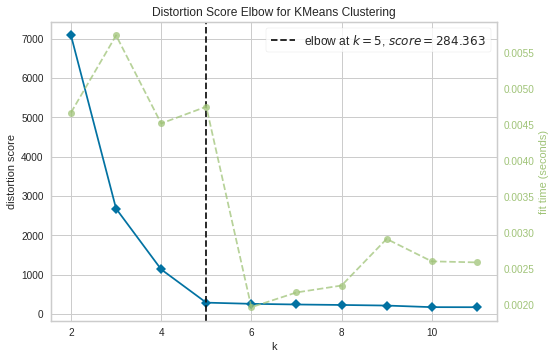

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(n_init='auto')

visualizer_elbow = KElbowVisualizer(model, k=(2,12))

visualizer_elbow.fit(data[0])        # Fit the data to the visualizer
visualizer_elbow.show() 

---
### Silhoutte index with Silhouette Visualizer

Según el índice Silhouette, cual es el mejor valor de K?

---

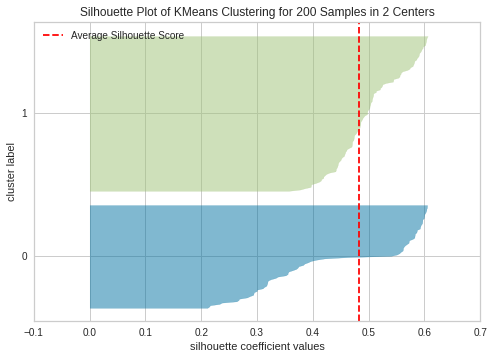

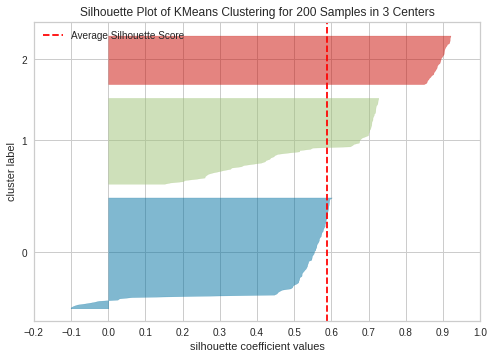

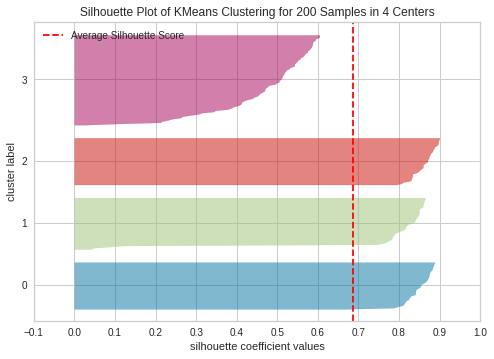

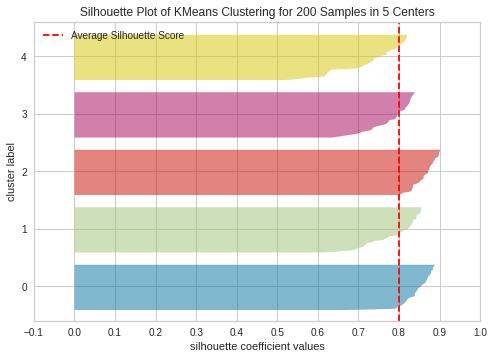

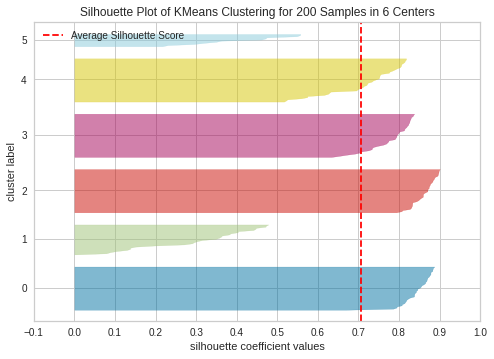

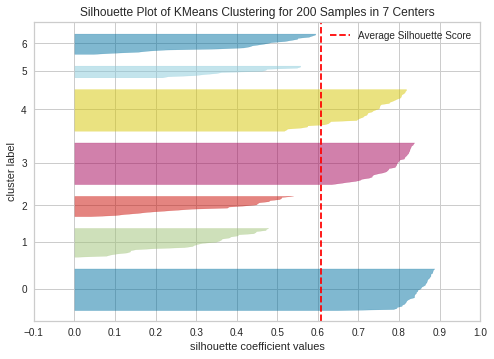

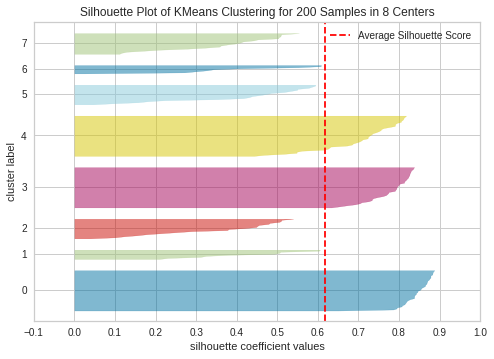

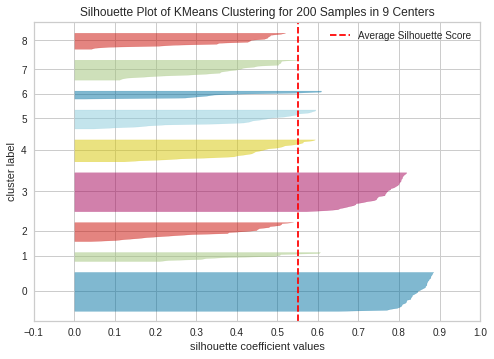

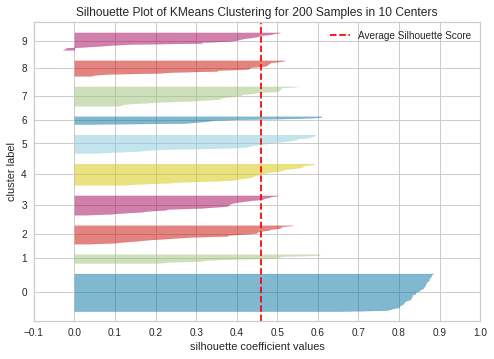

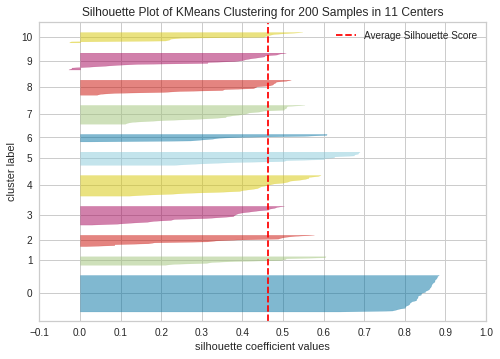

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer


for k in range(2,12):
    model = KMeans(n_clusters=k, random_state=0, n_init="auto")
    visualizer_sl = SilhouetteVisualizer(model, colors='yellowbrick')


    visualizer_sl.fit(data[0])        # Fit the data to the visualizer
    visualizer_sl.show() 




In [ ]:
from sklearn.metrics import silhouette_score

silhouette_dict = {}
for k in range(2,12):
    model = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(data[0])
    silhouette_avg = silhouette_score(data[0], model.labels_)
    silhouette_dict[k] = silhouette_avg

print("Silhouette index --> ")
for k,v in silhouette_dict.items():
    print(f"K={k} --> index_silh = {v:.3f}")

print("-----------------------------------------------------------------------")
print("Best K using silhouette index")
print("K --> ",max(silhouette_dict, key=silhouette_dict.get))

Silhouette index --> 
K=2 --> index_silh = 0.483
K=3 --> index_silh = 0.589
K=4 --> index_silh = 0.685
K=5 --> index_silh = 0.799
K=6 --> index_silh = 0.705
K=7 --> index_silh = 0.608
K=8 --> index_silh = 0.617
K=9 --> index_silh = 0.550
K=10 --> index_silh = 0.460
K=11 --> index_silh = 0.464
-----------------------------------------------------------------------
Best K using silhouette index
K -->  5
